In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

plt.style.use('fivethirtyeight')
%matplotlib inline

In [3]:
df = pd.read_csv('/content/drive/MyDrive/datascience/Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
df.isna().sum()

,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


No missing values from the dataset.

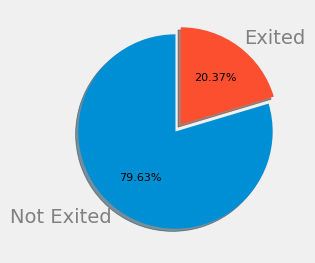

In [9]:
churn_values = df.Exited.value_counts()
labels = ['Not Exited', 'Exited']
explode = (0,0.09)

fig, ax = plt.subplots(figsize=(4,3), dpi=100)
wedges, texts, autotexts = ax.pie(
    churn_values, labels=labels, autopct='%1.2f%%',
    shadow = True, startangle =90, explode=explode
)

for text in texts:
  text.set_color('grey')
for autotext in autotexts:
  autotext.set_fontsize(8)
  autotext.set_color('white')
  autotext.set_color('black')

plt.show()

20% of the customer churned while other 80% have not.

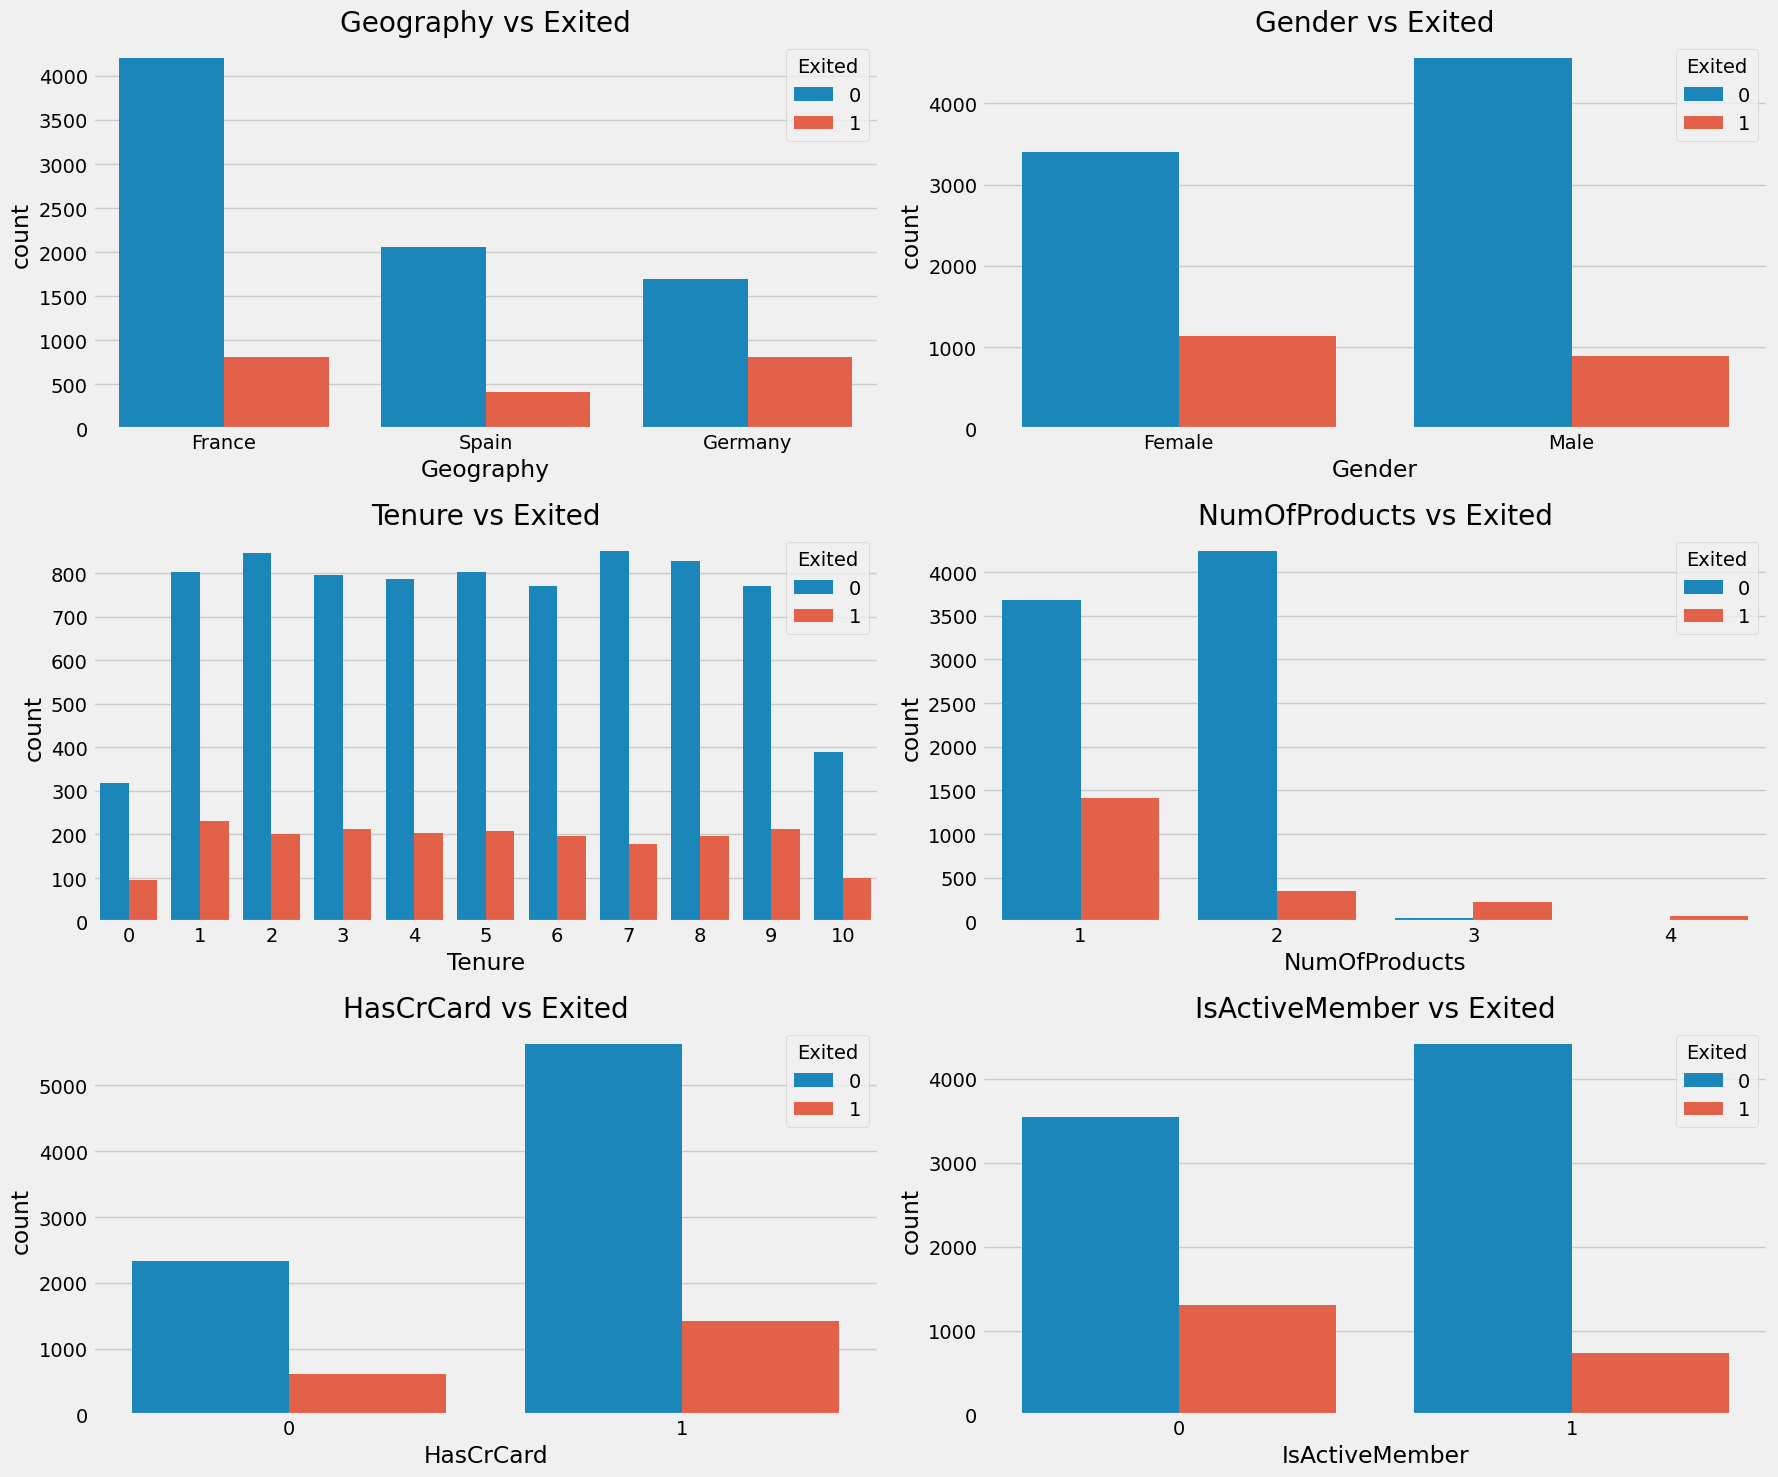

In [10]:
# List of columns to plot
cols = ['Geography', 'Gender', 'Tenure', 'NumOfProducts', 'HasCrCard', 'IsActiveMember']

# Create subplots
fig, axes = plt.subplots(3, 2, figsize=(18, 15))

# Flatten axes for easy looping
axes = axes.flatten()

# Plot countplots
for i, col in enumerate(cols):
    sns.countplot(x=col, hue='Exited', data=df, ax=axes[i])
    axes[i].set_title(f'{col} vs Exited')

plt.tight_layout()
plt.show()

From above Plots we can conclude that:-

* Majority of the customers are from france but most customers which churned are from germany maybe because of lack of resources as there are not many customers.
* The proportion of female customers churning is also greater than that of female customers.
* Majority of customers have tenure between 1 to 9 and churing rate is also high between these tenures.
* Most of the customers have 1 or 2 products and most customers which churned are having 1 products maybe they are not satisfied so they are churning.
* Interestingly, majority of customers that churned are those with credit cards but this can be a coincidence as majority of customers have credit cards.
* Unsurprisingly the inactive members have a greater churn and the overall proportion of inactive members is also very high.

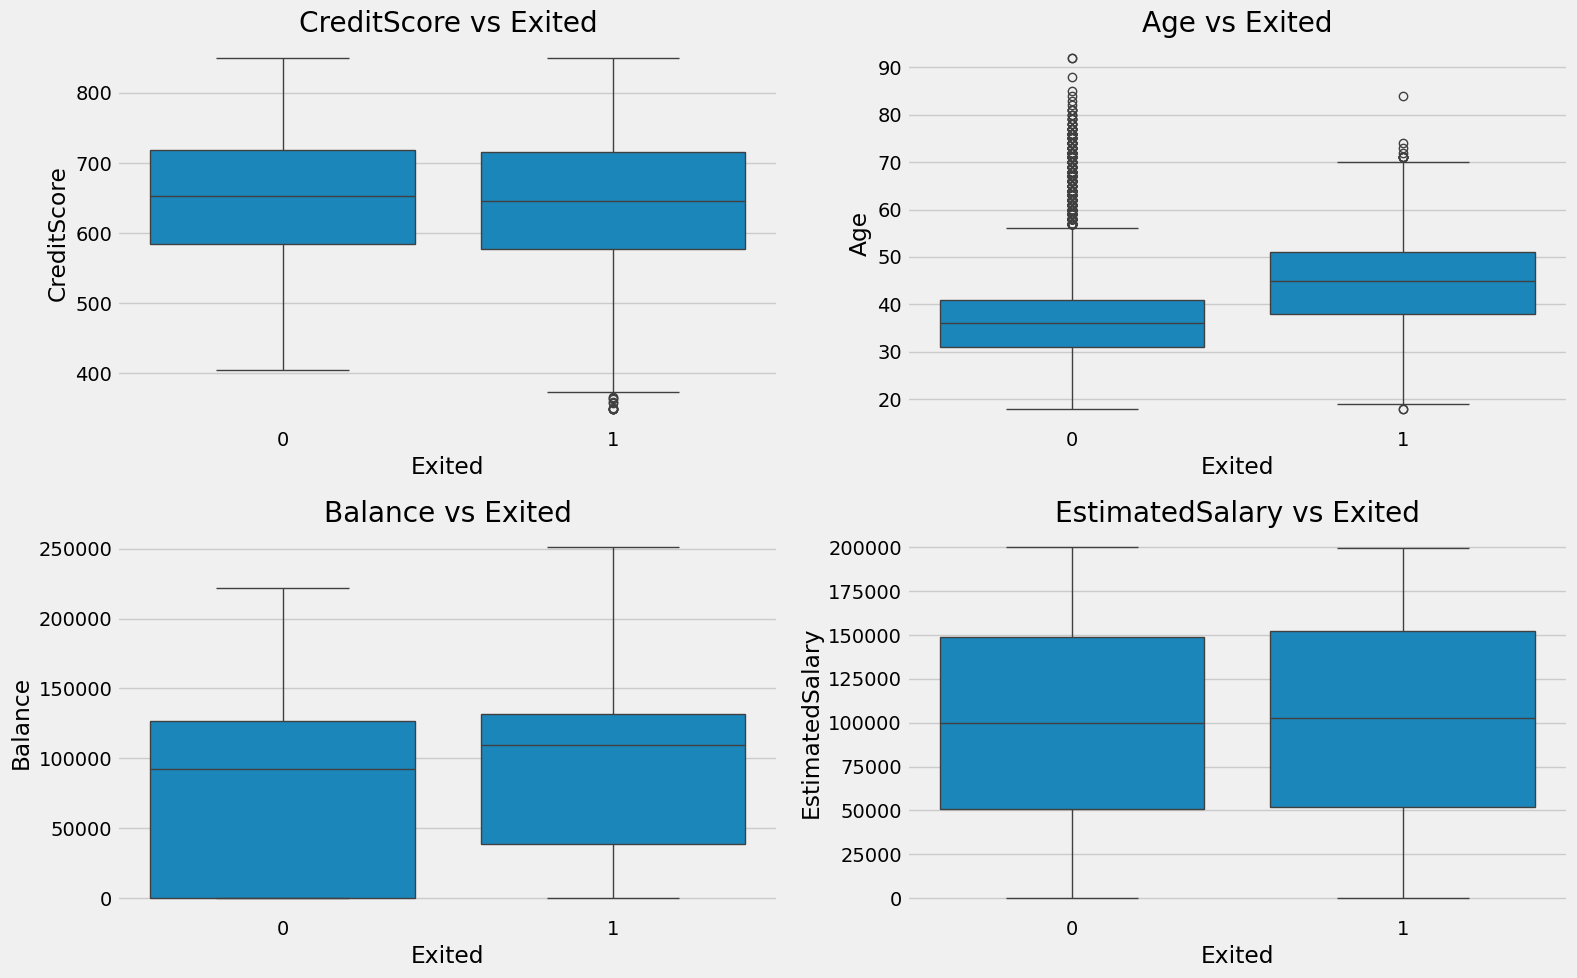

In [15]:
# Columns to plot
cols = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary']


# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(16, 10))
axes = axes.flatten()  # Flatten to 1D for easy looping

# Plot boxplots
for i, col in enumerate(cols):
    sns.boxplot(x='Exited', y=col, data=df, ax=axes[i])
    axes[i].set_title(f'{col} vs Exited')

plt.tight_layout()
plt.show()

From above Plots we can conclude that:-

* There is no significant difference in credit score distribution etween custers which are churned or not.
* The older customers are churning more than younger ones.
* Bank is loosing customers with significant bank balance.
* Estimated Salary does not have a significant on the likelihood to churn.

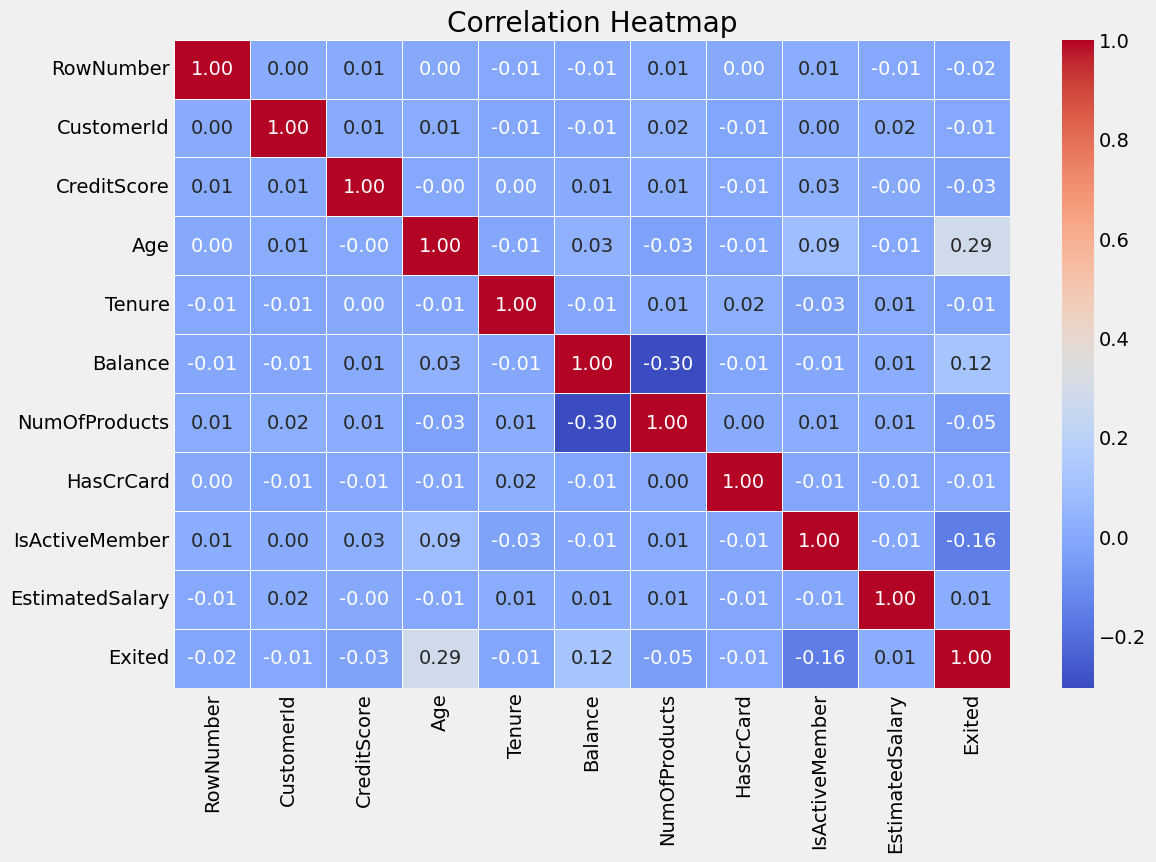

In [17]:
# Compute correlation matrix
corr_matrix = df.corr(numeric_only=True)

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Create heatmap
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)

# Optional: Add title
plt.title('Correlation Heatmap')

plt.show()

No any significat correlation from above graph.

In [18]:
# dropping useless columns

df.drop(columns = ['RowNumber', 'CustomerId', 'Surname'], axis = 1, inplace = True)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [19]:
df.Geography.value_counts()

,count
Geography,
France,5014
Germany,2509
Spain,2477


In [20]:
df['Geography'] = df['Geography'].map({'France' : 0, 'Germany' : 1, 'Spain' : 2})
df['Gender'] = df['Gender'].map({'Male' : 0, 'Female' : 1})

In [21]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,1,42,2,0.00,1,1,1,101348.88,1
1,608,2,1,41,1,83807.86,1,0,1,112542.58,0
2,502,0,1,42,8,159660.80,3,1,0,113931.57,1
3,699,0,1,39,1,0.00,2,0,0,93826.63,0
4,850,2,1,43,2,125510.82,1,1,1,79084.10,0


In [22]:
df['AgeTenureRatio'] = df['Age'] / (df['Tenure'] + 1)

In [23]:
df['BalanceSalaryRatio'] = df['Balance'] / (df['EstimatedSalary'] + 1)

In [25]:
df['IsYoungAndRich'] = ((df['Age'] < 30) & (df['Balance'] > 100000)).astype(int)

In [26]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,AgeTenureRatio,BalanceSalaryRatio,IsYoungAndRich
0,619,0,1,42,2,0.00,1,1,1,101348.88,1,14.000000,0.000000,0
1,608,2,1,41,1,83807.86,1,0,1,112542.58,0,20.500000,0.744670,0
2,502,0,1,42,8,159660.80,3,1,0,113931.57,1,4.666667,1.401362,0
3,699,0,1,39,1,0.00,2,0,0,93826.63,0,19.500000,0.000000,0
4,850,2,1,43,2,125510.82,1,1,1,79084.10,0,14.333333,1.587035,0


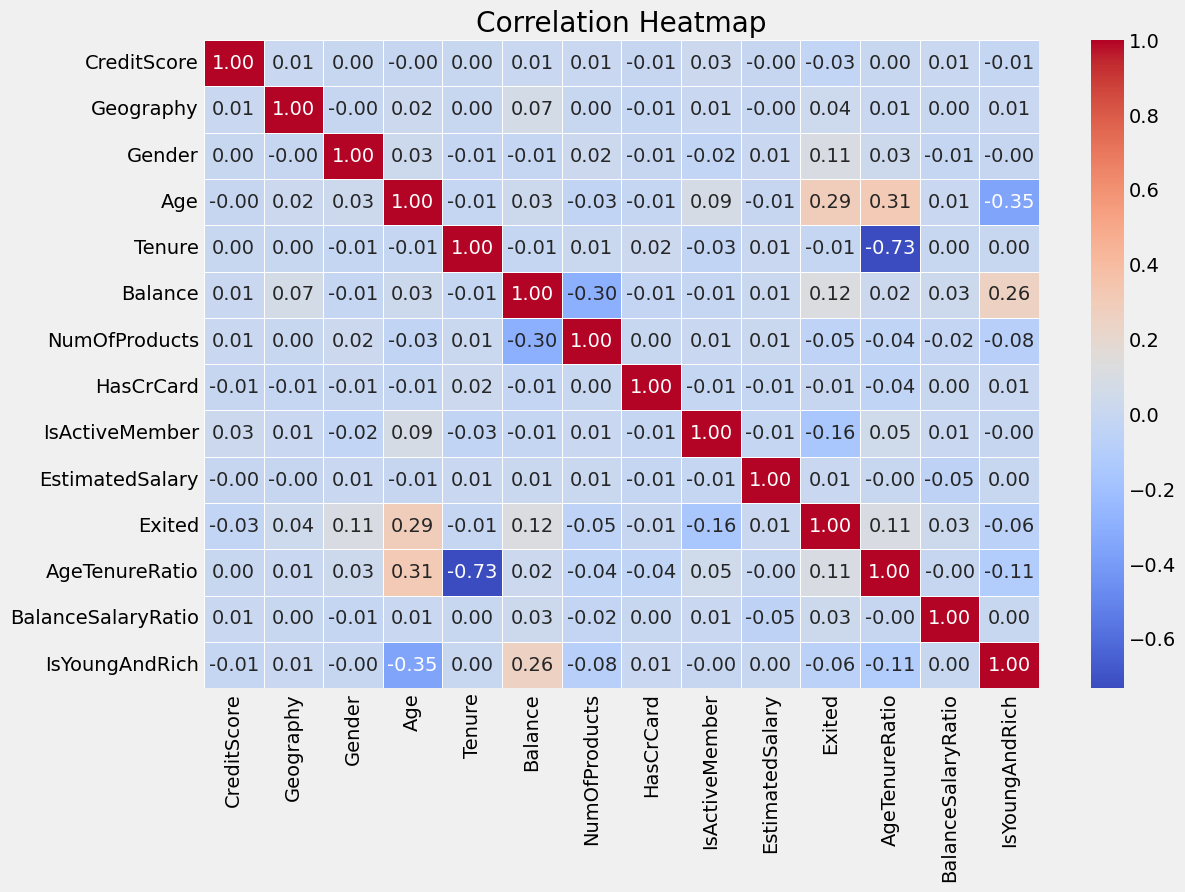

In [27]:
# Compute correlation matrix
corr_matrix = df.corr(numeric_only=True)

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Create heatmap
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)

# Optional: Add title
plt.title('Correlation Heatmap')

plt.show()

In [37]:
import numpy as np
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from sklearn.utils.class_weight import compute_class_weight

# Example data (replace with your actual data)
X = np.random.rand(1000, 13)  # 13 features based on error (adjust if incorrect)
y = np.random.choice([0, 1], size=1000, p=[0.9, 0.1])  # Imbalanced binary labels
num_classes = 2

# Step 1: Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Apply SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Step 3: Apply StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_smote)
X_test_scaled = scaler.transform(X_test)

# Step 4: One-hot encode labels
y_train_smote_cat = to_categorical(y_train_smote, num_classes=num_classes)
y_test_cat = to_categorical(y_test, num_classes=num_classes)

# Step 5: Check shapes
print("X_train_scaled shape:", X_train_scaled.shape)
print("X_test_scaled shape:", X_test_scaled.shape)
print("y_train_smote_cat shape:", y_train_smote_cat.shape)
print("y_test_cat shape:", y_test_cat.shape)

# Step 6: Define model
input_dim = X_train_scaled.shape[1]  # Dynamically set to 13 (or 10 if data is fixed)
model = Sequential([
    Dense(10, kernel_initializer='normal', activation='relu', input_shape=(input_dim,)),
    Dropout(rate=0.1),
    BatchNormalization(),
    Dense(7, kernel_initializer='normal', activation='relu'),
    Dropout(rate=0.1),
    BatchNormalization(),
    Dense(num_classes, kernel_initializer='normal', activation='softmax')  # Softmax for multi-class
])

# Step 7: Compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Step 8: Compute class weights
class_weights = dict(zip(np.unique(y_train_smote), compute_class_weight('balanced', classes=np.unique(y_train_smote), y=y_train_smote)))

# Step 9: Fit model
model_history = model.fit(
    X_train_scaled,
    y_train_smote_cat,
    validation_data=(X_test_scaled, y_test_cat),  # Use validation_data
    epochs=100,
    class_weight=class_weights
)

X_train_scaled shape: (1416, 13)
X_test_scaled shape: (200, 13)
y_train_smote_cat shape: (1416, 2)
y_test_cat shape: (200, 2)
Epoch 1/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - accuracy: 0.5148 - loss: 0.6927 - val_accuracy: 0.1250 - val_loss: 0.6968
Epoch 2/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.5926 - loss: 0.6689 - val_accuracy: 0.2100 - val_loss: 0.6979
Epoch 3/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6255 - loss: 0.6433 - val_accuracy: 0.2050 - val_loss: 0.7026
Epoch 4/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6845 - loss: 0.6127 - val_accuracy: 0.5200 - val_loss: 0.6918
Epoch 5/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6820 - loss: 0.5841 - val_accuracy: 0.5950 - val_loss: 0.6837
Epoch 6/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7365 - loss: 0.5548 - val_accuracy: 0.6300 - val_loss: 0.6682
Epoch 7/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7523 - loss: 0.5317 - val_accuracy: 0.6500 - v

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7191 - loss: 0.9268
Test Loss: 0.6559
Test Accuracy: 0.7750
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 

Classification Report:
              precision    recall  f1-score   support

     Class 0       0.90      0.84      0.87       179
     Class 1       0.15      0.24      0.18        21

    accuracy                           0.78       200
   macro avg       0.53      0.54      0.53       200
weighted avg       0.82      0.78      0.80       200


Confusion Matrix:
[[150  29]
 [ 16   5]]

ROC-AUC Score: 0.6026
PR-AUC Score: 0.1591


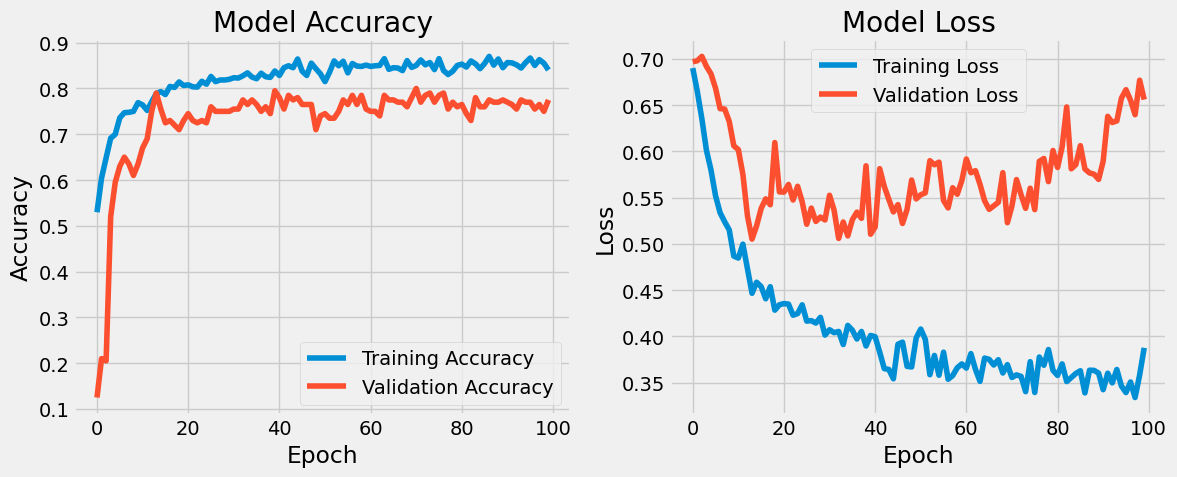

In [39]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, average_precision_score
import matplotlib.pyplot as plt

# Step 10: Evaluate model
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test_cat)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# Step 11: Detailed metrics
y_pred = model.predict(X_test_scaled)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test_cat, axis=1)

# Classification report
print("\nClassification Report:")
print(classification_report(y_test_classes, y_pred_classes, target_names=['Class 0', 'Class 1']))

# Confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test_classes, y_pred_classes))

# ROC-AUC and PR-AUC
y_pred_probs = y_pred[:, 1]  # Probability for Class 1
roc_auc = roc_auc_score(y_test_classes, y_pred_probs)
pr_auc = average_precision_score(y_test_classes, y_pred_probs)
print(f"\nROC-AUC Score: {roc_auc:.4f}")
print(f"PR-AUC Score: {pr_auc:.4f}")

# Step 12: Visualize training history
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(model_history.history['accuracy'], label='Training Accuracy')
plt.plot(model_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(model_history.history['loss'], label='Training Loss')
plt.plot(model_history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

Classification Report
The classification report provides precision, recall, F1-score, and support for each class, along with overall metrics.

* Class 0 (Majority Class):
Precision (0.90): 90% of the samples predicted as Class 0 were actually Class 0. This high precision indicates the model is reliable when it predicts Class 0.

* Recall (0.84): The model correctly identified 84% of the actual Class 0 samples. This is solid but suggests some Class 0 samples were misclassified as Class 1.

* F1-Score (0.87): The harmonic mean of precision and recall for Class 0 is strong, reflecting good performance on the majority class.

* Support (179): There are 179 samples of Class 0 in the test set, confirming it’s the majority class.

* Class 1 (Minority Class):
Precision (0.15): Only 15% of the samples predicted as Class 1 were actually Class 1. This low precision means many predictions for Class 1 are incorrect (high false positives).

* Recall (0.24): The model correctly identified only 24% of the actual Class 1 samples, meaning it missed most of the minority class (high false negatives).

* F1-Score (0.18): The low F1-score indicates poor performance on the minority class, as both precision and recall are low.

* Support (21): There are only 21 samples of Class 1, confirming the dataset is imbalanced (roughly 10:1 ratio).

Overall Metrics:
* Accuracy (0.78): The model correctly classified 78% of all test samples (200 total). However, this is misleading due to the imbalance, as the model performs well on Class 0 (179 samples) but poorly on Class 1 (21 samples).

* Macro Average (Precision: 0.53, Recall: 0.54, F1-Score: 0.53): Averages metrics across classes without considering class size. The low values reflect poor performance on Class 1 dragging down the average.

* Weighted Average (Precision: 0.82, Recall: 0.78, F1-Score: 0.80): Accounts for class imbalance by weighting metrics by support. These are higher because Class 0 (with more samples) performs well.

* Takeaway: The model performs well on the majority class (Class 0) but struggles significantly with the minority class (Class 1), as shown by the low precision, recall, and F1-score for Class 1. This is common in imbalanced datasets, even with SMOTE and class weights.



ROC-AUC Score (0.6026)
* Definition: ROC-AUC measures the model’s ability to distinguish between classes based on the probability scores for Class 1. A score of 0.5 indicates random guessing, and 1.0 indicates perfect separation.

* Interpretation: A ROC-AUC of 0.6026 is slightly better than random guessing but indicates poor discriminative ability. The model struggles to separate Class 1 from Class 0 effectively.

* Context: For imbalanced datasets, ROC-AUC can be optimistic because it considers true negatives (Class 0), which are abundant here.

4. PR-AUC Score (0.1591)
Definition: PR-AUC (Precision-Recall Area Under Curve) measures the trade-off between precision and recall for Class 1. It’s more informative for imbalanced datasets, as it focuses on the minority class.

* Interpretation: A PR-AUC of 0.1591 is very low, reflecting the model’s poor performance on Class 1 (low precision and recall). The baseline PR-AUC is roughly the proportion of the positive class (21 / 200 = 0.105), so 0.1591 is only slightly better than random guessing.

* Takeaway: The low PR-AUC confirms the model’s struggle with the minority class, consistent with the low F1-score for Class 1.

* Overall Interpretation
Model Performance: The model performs well on the majority class (Class 0: high precision, recall, and F1-score) but poorly on the minority class (Class 1: low precision, recall, and F1-score). The overall accuracy (78%) is decent but misleading due to the imbalance (89.5% Class 0, 10.5% Class 1).

* Imbalance Issue: Despite using SMOTE and class weights, the model is still biased toward Class 0, as shown by the high false positives (29) and false negatives (16) for Class 1.

* Metric Insights:
The low F1-score (0.18) for Class 1 indicates the model is not effectively identifying the minority class.

* The ROC-AUC (0.6026) and PR-AUC (0.1591) suggest the model has limited discriminative power, especially for Class 1.

* Training Effectiveness: The use of SMOTE and class weights has not fully mitigated the imbalance, suggesting potential issues with the model architecture, hyperparameters, or preprocessing.

